## Model Validation

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data
y = iris.target

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Validação de modelos do jeito errado

In [5]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [6]:
from sklearn.metrics import accuracy_score # Taxa de acerto do modelo

accuracy_score(y,model.predict(X))

1.0

## Validação do jeito correto: Holdout sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.7) 

In [8]:
model_dt = DecisionTreeClassifier()
model_nb = GaussianNB()

model_dt.fit(X_train,y_train)
model_nb.fit(X_train,y_train)

GaussianNB()

In [9]:
print(accuracy_score(y_test,model_dt.predict(X_test)))
print(accuracy_score(y_test,model_nb.predict(X_test)))

0.9555555555555556
0.9555555555555556


## Validação do jeito certo: Validação cruzada (Cross-validation)

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
scores_dt = cross_val_score(model_dt,X,y,cv=5)
print(f'DT accuracy: {scores_dt.mean():.3f} +- {scores_dt.std():.3f}')

DT accuracy: 0.967 +- 0.037


In [12]:
scores_nb = cross_val_score(model_nb,X,y,cv=5)
print(f'NB accuracy: {scores_nb.mean():.3f} +- {scores_nb.std():.3f}')

NB accuracy: 0.953 +- 0.027


### Leave one out

In [13]:
from sklearn.model_selection import LeaveOneOut
scores_nb = cross_val_score(model_nb,X,y,cv=LeaveOneOut())
scores_nb.mean()

0.9533333333333334

In [14]:
scores_dt = cross_val_score(model_dt,X,y,cv=LeaveOneOut())
scores_dt.mean()

0.9466666666666667

## Bias-variance trade-off (compromisso entre viés e variância)

In [19]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 

In [20]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree=degree),
                         LinearRegression(**kwargs))

In [21]:
def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

Text(0.5, 1.0, 'High-variance model: Overfits the data')

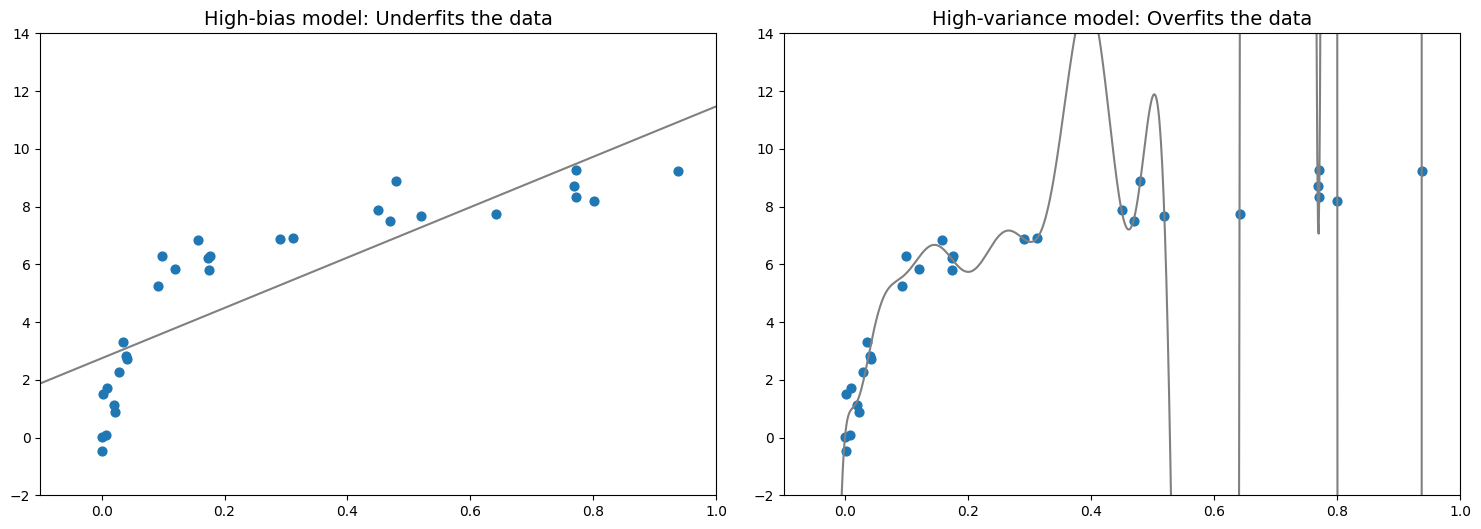

In [23]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)

Text(0.02, 0.91, 'validation score: $R^2$ = -1.8e+09')

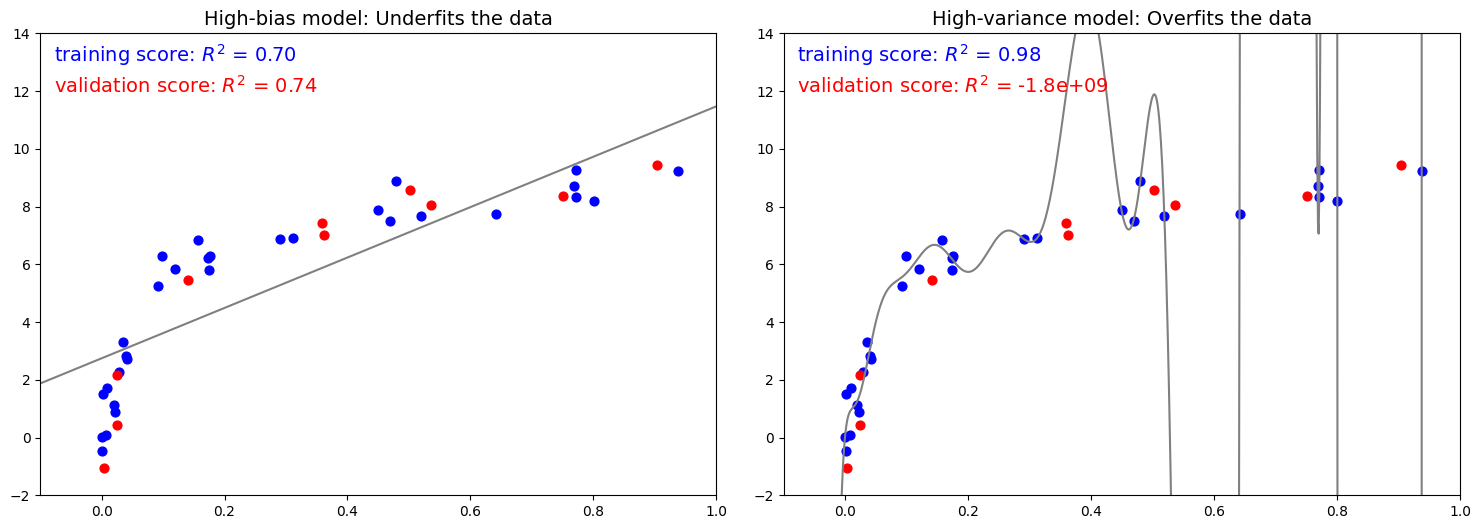

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = make_data(10, rseed=42)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red')

Text(0.5, 1.0, 'Validation Curve Schematic')

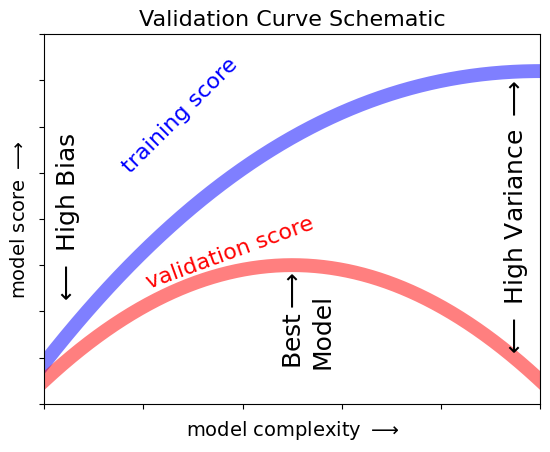

In [26]:
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots()
ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
ax.plot(x, y1, lw=10, alpha=0.5, color='red')

ax.text(0.15, 0.2, "training score", rotation=45, size=16, color='blue')
ax.text(0.2, -0.05, "validation score", rotation=20, size=16, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Validation Curve Schematic", size=16)

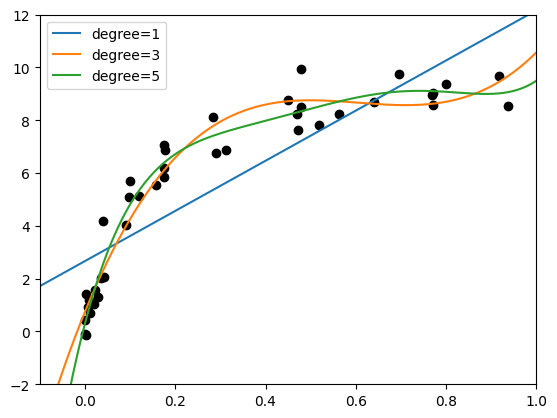

In [30]:
X, y = make_data(40)
X_test = np.linspace(-0.1, 1.1,500).reshape(-1,1)

plt.scatter(X.ravel(),y, color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label=f'degree={degree}')
plt.xlim(-0.1,1)
plt.ylim(-2,12)
plt.legend(loc='best')

In [34]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=5)

Text(0, 0.5, 'score')

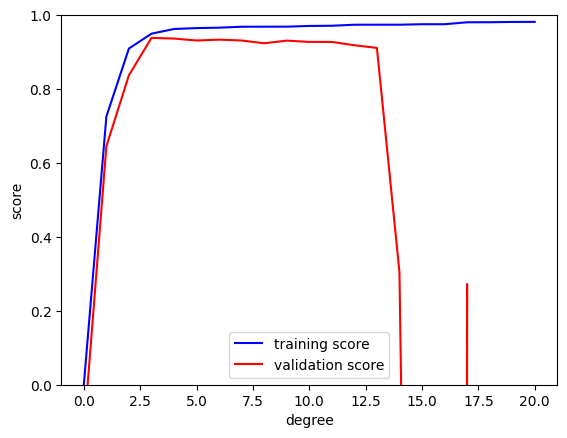

In [41]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
#plt.xlim(1,15)
#plt.ylim(0.8,1)

(-0.04687651021505175,
 0.9844070023112612,
 -0.6358426925271523,
 10.458293315197224)

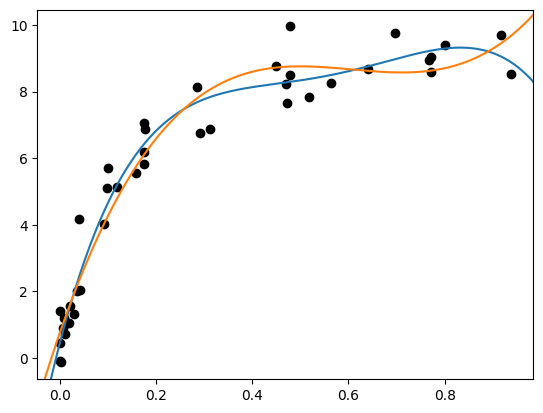

In [50]:
plt.scatter(X.ravel(),y,color='black')
lim = plt.axis()
y_test = PolynomialRegression(4).fit(X,y).predict(X_test)
y_test2 = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.plot(X_test.ravel(),y_test2)
plt.axis(lim)

### Otimização de hiperparâmetros

#### GridSearch

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree':np.arange(21),
              'linearregression__fit_intercept':[True,False]}

grid = GridSearchCV(PolynomialRegression(),param_grid,cv=5)

In [45]:
grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [46]:
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 4}